# PubChem

PubChem provides several ways for programmatic access to its data:

  - PUG-REST: simplified access route to PubChem without the overhead of XML or SOAP envelopes. PUG-REST provides convenient acces to information on PubChem records not posible with other PUG services
  
  - PUG-View: REST-style web service that provides full reports, including thirty-party tectual annotation, for individual PubChem  records.
  
  - Power User Gateway (PUG): PUG provides programmatic acces to PubChem services via single common gateway interface (CGI), available at http://pubchem.ncbi.nlm.nih.gov/pug/pug.cgi.
  
  - PUG-SOAP: web service access to PubChem data usin the somple object acces protocol (SOAP).
  
  - PubChemRDF REST interface: This is a REST-style interface designed to acces RDF-encoded PubChem data.
  
  - Entrez Utilities: E-utils are a set of programs used to access to information contained in the Entrez system.

### Programattic acces using PUG-REST.

**PUG-REST tutorial**: https://pubchemdocs.ncbi.nlm.nih.gov/pug-rest-tutorial

How PUG REST Works:
The URL Path: Most – if not all – of the information the service needs to produce its results is encoded into the URL. 


The conceptual framework of this service is the three-part request: 
- input – that is, what identifiers are we talking about (ID, name, SMILEs, InChl...); Identifier: SID, CID, AID

- operation – what to do with those identifiers; 

- output – what information should be returned: xml, sdf, png, txt,... 


**Design of the URL:**
PUG REST is entirely based on HTTP (or HTTPS) requests
"https://pubchem.ncbi.nlm.nih.gov/rest/pug"

   **Input**: 
   
            /compound/name/xxx   
	        /compound/cid/xxx
            cid | name | smiles | inchi | sdf | inchikey | formula | 
           
   **Operation:**
   
            /property/InChI
            /property/MolecularWeight
            /cids
              
              If no operation is specified at all, the default is to retrieve the entire record. 
              What operations are available    are dependent on the input domain. 


              <compound property> = property / [comma-separated list of property tags]
              Property tags: MolecularWeight, MolecularFormula,CanonicalSmiles,cids,XLogP... 
              check in the compound property table (https://pubchemdocs.ncbi.nlm.nih.gov/pug-rest)
              
   **Output:** /TXT
            /JSON
            /PNG
            
            <output specification> = XML | ASNT | ASNB | JSON | JSONP | SDF | CSV | PNG | TXT

## *Examples*


In [1]:
#Import libraries
import requests
import pandas as pd # analysis of tabular data
from IPython.display import Image # Public API for display tools in IPython.

In [2]:
# Get PubChem CID by name

name = "ibuprofen"
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/name/{name}/cids/JSON"

r = requests.get(url)
response = r.json()
if "IdentifierList" in response:
    cid = response["IdentifierList"]["CID"][0]
else:
    raise ValueError(f"Could not find matches for compound: {name}") #  used to raise exceptions or errors
print(f"PubChem CID for {name} is:\n{cid}")


PubChem CID for ibuprofen is:
3672


#### RETRIEVE MOLECULAR PROPERTIES


To retrieve molecular properties we need to define it in the URL as property ( /compound/name/property/xxx). 

Check properties in the compound property table (https://pubchemdocs.ncbi.nlm.nih.gov/pug-rest)




In [3]:
# Get molecular weight for ibuprofen
cid ="3672"
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/property/MolecularWeight/JSON"

r = requests.get(url)
response = r.json()

if "PropertyTable" in response:
    mol_weight = response["PropertyTable"]["Properties"][0]["MolecularWeight"]
else:
    raise ValueError(f"Could not find matches for PubChem CID: {cid}")
print(f"Molecular weight for {name} is:\n{mol_weight}")


Molecular weight for ibuprofen is:
206.28


**Depict a compound using PubChem: get a png image**

The 2D structure of ibuprofen:


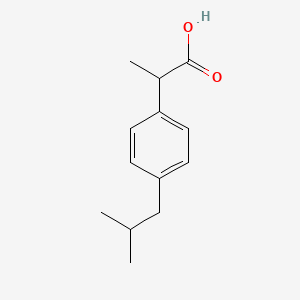

In [4]:
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/{cid}/PNG"

r = requests.get(url)
r.raise_for_status()

print (f"The 2D structure of {name}:")
display(Image(r.content))

# Similarity search



*Operation defined in the URL:*

Fastsimilarity_2d: PubChem substructure fingerprint and Tanimoto Index

Fastsimilarity_3d: Similarity is evaluated with the shape-Tanimoto (ST) and color-Tanimoto (CT) scores, which quantify the similarity between their conformers in 3-D shape and functional group orientations, respectively. The ST and CT scores are calculated using the Gaussian-shape overlay method by Grant and Pickup, and implemented in the Rapid Overlay of Chemical Structures.However, because 3-D similarity search takes much longer than 2-D similarity search, it often exceeds the 30-second time limit and returns a time-out error, especially when the query molecule is big. 3-D similarity search uses a shape-Tanimoto of >=0.80 and a color-Tanimoto of >=0.50 as a similarity threshold. 


In [5]:
smiles = "C1COCC(=O)N1C2=CC=C(C=C2)N3C[C@@H](OC3=O)CNC(=O)C4=CC=C(S4)Cl"
url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/fastsimilarity_2d/smiles/{smiles}/cids/txt?Threshold=99"

response= requests.get (url)
print(response.text)


9875401
6433119
11524901
25255944
25164166
25190310
56589668
56598114
68152323
123868009
143433422
144489887
145624236
145624246
154630277
159596345
11994745
25190129
25190130
25190186
25190187
25190188
25190189
25190190
25190248
25190249
25190250
25190251
25190252
25190311
25255845
25255945
25255946
49849874
133687098
156594383
169435566



### BE CAREFULLY!!
It is worth mentioning that the parameter name "Threshold" is case-sensitive. If "threshold" is used (rather than "Threshold"), it will be ignored and the default value (0.90) will be used for the parameter. 